Epoch 1/12
433/433 [==============================] - 44s 101ms/step - loss: 1.3196 - accuracy: 0.6439 - val_loss: 0.4299 - val_accuracy: 0.8860
Epoch 2/12
433/433 [==============================] - 44s 101ms/step - loss: 0.4307 - accuracy: 0.8777 - val_loss: 0.2537 - val_accuracy: 0.9306
Epoch 3/12
433/433 [==============================] - 44s 101ms/step - loss: 0.2958 - accuracy: 0.9157 - val_loss: 0.1934 - val_accuracy: 0.9510
Epoch 4/12
433/433 [==============================] - 44s 102ms/step - loss: 0.2393 - accuracy: 0.9349 - val_loss: 0.1684 - val_accuracy: 0.9566
Epoch 5/12
433/433 [==============================] - 44s 102ms/step - loss: 0.2016 - accuracy: 0.9456 - val_loss: 0.1496 - val_accuracy: 0.9621
Epoch 6/12
433/433 [==============================] - 44s 102ms/step - loss: 0.1764 - accuracy: 0.9525 - val_loss: 0.1444 - val_accuracy: 0.9624
Epoch 7/12
433/433 [==============================] - 44s 102ms/step - loss: 0.1584 - accuracy: 0.9572 - val_loss: 0.1473 - val_ac

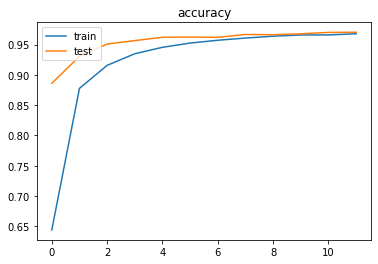

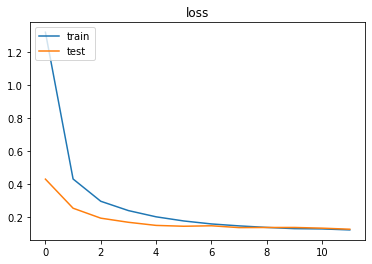

In [17]:
import keras
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
import pickle
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

path = './png_file/katakana.pickle'
data = pickle.load(open(path, 'rb'))
im_size = 25
in_size = (im_size, im_size, 1)
out_size = 46


x=[]
y=[]
for d in data:
    num, img = d
    im = img.astype('float').reshape(in_size)/ 255
    x.append(im)
    y.append(keras.utils.to_categorical(num, out_size))
x = np.array(x)
y = np.array(y)

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2)

model = keras.models.Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=(in_size)))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(out_size, activation='softmax'))

model.compile(
    loss='categorical_crossentropy',
    optimizer=RMSprop(),
    metrics=['accuracy']
)

hist = model.fit(x_train, y_train, batch_size=128, epochs=12,verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=1)
print('正解率=', score[1], 'loss=', score[0])

plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('accuracy')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()